In [2]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from scipy.optimize import basinhopping
%matplotlib inline

A continuación utilizo la serie de Fourier para ondas cuadradas dada en el cuaderno ```python 05-Fourier``` para aproximar una función ventana de altura $\pi/4$ y de período $2\pi$.

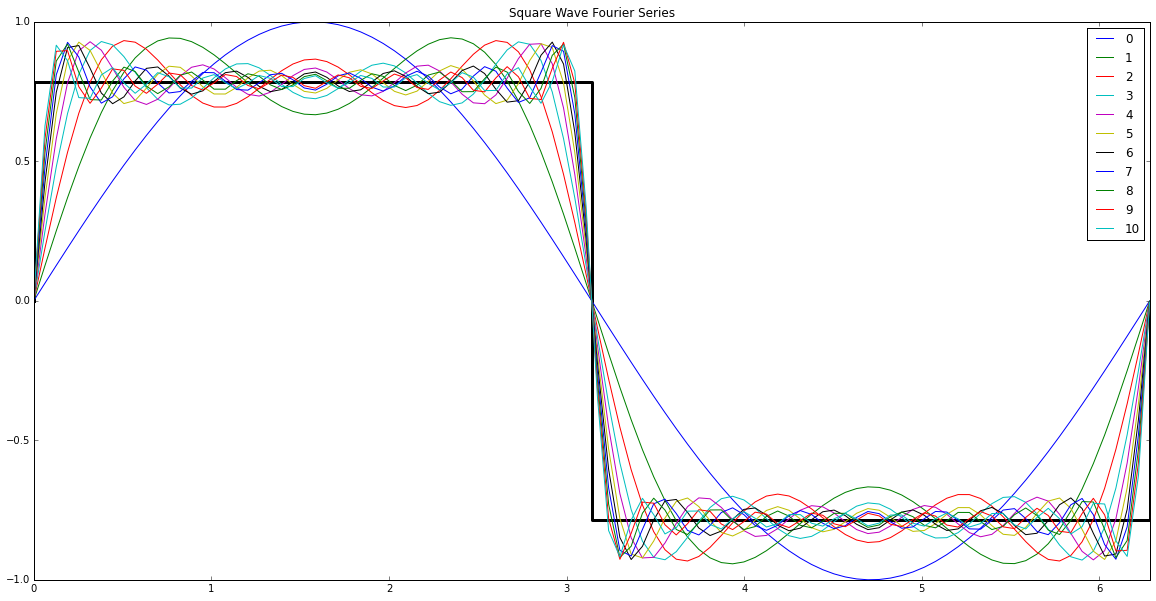

In [3]:
fig=plt.figure(figsize=(20,10))
x=np.linspace(0.,2*np.pi,100)
y=0.*x
plt.plot([0.,0.,np.pi,np.pi,2*np.pi,2*np.pi],[0.,np.pi/4,np.pi/4,-np.pi/4,-np.pi/4,0.],"k",lw=3)
for i in range(11):
    y+=np.pi/np.pi*1./(2*i+1)*np.sin((2*i+1)*x) # Serie de Fourier dada el el cuaderno de ipython proporcionado en clase
    plt.plot(x,y,label=str(i)) # Grafico la serie de Fourier con el label del número de términos considerados en la serie
plt.xlim(0.,2*np.pi)
plt.legend(loc='best')
plt.title("Square Wave Fourier Series")
plt.show()

In [4]:
# Defino la función que retorna el valor de la serie de Forurier para 
# la onda cuadrada en consideración al pasar el número de términos de la serie por parámetro.
def f(x,it):
    y=0.*x
    for i in range(it):
        y+=np.pi/np.pi*1./(2*i+1)*np.sin((2*i+1)*x)
    return y

In [5]:
# Implemento el método que devuelve el mínimo partiendo del ejemplo dado en el enunciado del taller.
minimizer_kwargs = {"method": "BFGS"}
y = []
N=30
# Se tienen en centa diversos números de términos en la serie de Fourier, entre 0 y N términos.
for i in range(N):
    def g(x):
        return f(x,i)
    ret = basinhopping(g, np.pi, minimizer_kwargs=minimizer_kwargs,niter=200)
    y.append(abs(ret.fun))

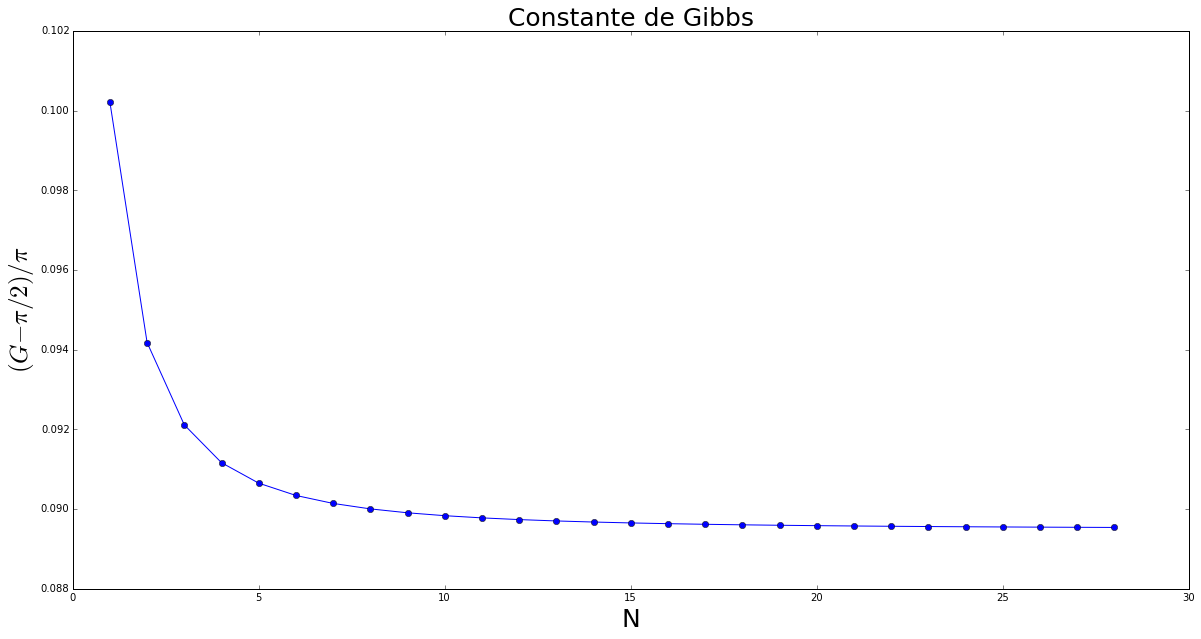

In [6]:
# Genero y grafico el arreglo con los valores de la constante de Gibbs para comparar con la imagen dada.

G = []
for i in range(1,len(y[1:])):
    G.append((2*y[1:][i]-np.pi/2)/np.pi) 
        
plt.figure(figsize=(20,10))
plt.plot(range(1,len(y[1:])),G)
plt.plot(range(1,len(y[1:])),G,'bo')
plt.xlabel('N',fontsize=25)
plt.ylabel(r'$(G - \pi/2)/\pi$',fontsize=25)
plt.title('Constante de Gibbs',fontsize=25)
plt.show()